# Developement notebook

In [10]:
import init_paths
import torch
import cv2
import os
import numpy as np



from torch.utils.data import DataLoader

from src.data.dataset import Foot3DDataset, NoTextureLoading, BatchCollator
from src.model.renderer import FootRenderer
from src.model.model import model_from_opts, process_opts


In [2]:
gpu = 2
if torch.cuda.is_available():
    torch.cuda.set_device(gpu)
    device = f"cuda:{gpu}"
else:
    device = "cpu"

Global dataset importation

In [3]:
collate_fn = BatchCollator(device=device).collate_batches
dataset = Foot3DDataset(
    left_only=True,
    tpose_only=False,
    is_train=False,
    # N=model.params['val_size'],
    device=device,
)
gt_loader = DataLoader(dataset, shuffle=False, collate_fn=collate_fn)

/home/binders/FIND/foot3d_dataset/foot3d_slice.json


Template dataset importation

In [4]:
template_foot = '0003'
template_dset = Foot3DDataset(
    left_only=True, tpose_only=True, specific_feet=[template_foot], device=device
)
template_loader = DataLoader(template_dset, shuffle=False, collate_fn=collate_fn)

/home/binders/FIND/foot3d_dataset/foot3d_slice.json


In [5]:
meshes = []
for i, template in enumerate(template_loader):
    meshes.append(template['mesh'])
meshes

Rendering

In [6]:
imsize = 256
renderer = FootRenderer(image_size=imsize, device=device)
# Render feet to images
R, T = renderer.linspace_views(
        nviews=1, dist=0.5, elev_min=50, elev_max=90
) 
out = renderer(
    meshes[0], 
    R, 
    T, 
    return_images=True, 
    return_mask=True,
    mask_with_grad=False,
)  # create the render with the giver camera
image = out['image'][0,0].cpu().numpy()
mask = out['mask'][0,0].cpu().numpy()

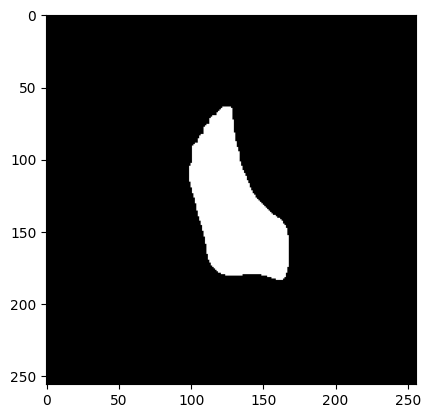

In [7]:
import matplotlib.pyplot as plt

plt.imshow(mask, cmap='gray')

### Generate random foot

In [14]:
os.getcwd()

'/home/binders/FIND/src/dev'

In [24]:
# loading options
opts = "./../../exp/3D_only/FIND/opts.yaml"
opts = process_opts(opts, eval=True)
#opts.load_model = os.path.join("./../../exp/3D_only/FIND/model_best.pth")
# opts.device = device

usage: ipykernel_launcher.py [-h] [--gpu GPU] [--silent] [--left_only]
                             [--tpose_only] [--full_caching] [--train_and_val]
                             [--low_poly_meshes] [--low_res_textures]
                             [--n_train N_TRAIN] [--n_val N_VAL]
                             [--batch_size_train BATCH_SIZE_TRAIN]
                             [--batch_size_val BATCH_SIZE_VAL] [--shuffle]
                             [--model_type {neural,pca,vertexfeatures,supr}]
                             [--load_model LOAD_MODEL]
                             [--model_name MODEL_NAME]
                             [--progressive_encoding]
                             [--no_positional_encoding] [--lr_net LR_NET]
                             [--lr_reg LR_REG] [--lr_val LR_VAL]
                             [--lr_latent LR_LATENT] [--reg]
                             [--reg_epochs REG_EPOCHS]
                             [--reg_save_every REG_SAVE_EVERY]
              

AssertionError: 